### TPC8 - Processamento de datasets

**Keyname**: TPC 8    
**Título**: Processamento de datasets   
**Data de início:** 2021/12/02        
**Data de fim:** 2021/12/09    
**Supervisor:** [José Carlos Leite Ramalho](https://algoritmi.uminho.pt/user/jose-carlos-leite-ramalho/)  
**Autor:** Bruno Miguel Gonçalves Machado, A97374   
**Resumo:** Este trabalho denominado *processamento de datasets*, consiste num conjunto de funções que fazem a leitura de datasets; o seu processamento nomeadamente: *consulta de dataset*, *listagem*, *distribuição por modalidade*, *distribuição por clubes*, *distribuição por ano*, *distribuição parametrizada*; e a produção de dados estatísticos, como os gráficos das distribuições por modalidade e de uma distribuição qualquer. Por fim, temos também uma função que permite a criação de uma janela que englobe as várias funções mencionadas anteriormente. Este programa está escrito em **python**.

## Dataset

Para a resolução dos exercícios desta ficha, descarrega o dataset de exames médicos desportivos do site da UC.

### Estrutura do dataset
O dataset tem a seguinte estrutura:

```
_id,index,dataEMD,nome/primeiro,nome/último,idade,género,morada,modalidade,clube,email,federado,resultado
6045074cd77860ac9483d34e,0,2020-02-25,Delgado,Gay,28,F,Gloucester,BTT,ACRroriz,delgado.gay@acrroriz.biz,true,true
6045074ca6adebd591b5d239,1,2019-07-31,Foreman,Prince,34,M,Forestburg,Ciclismo,ACDRcrespos,foreman.prince@acdrcrespos.org,false,true
6045074c221e2fdf430e9ef0,2,2021-01-06,Cheryl,Berger,21,M,Umapine,Basquetebol,Vitoria,cheryl.berger@vitoria.biz,false,true
6045074c529cbdce549d3923,3,2020-11-19,Graves,Goff,29,F,Babb,Andebol,AVCfamalicão,graves.goff@avcfamalicão.co.uk,false,false
6045074c3319a0f9e79aad87,4,2019-09-01,Mckay,Bolton,29,F,Chilton,Futebol,ACDRcrespos,mckay.bolton@acdrcrespos.me,false,false
6045074c222607e7520ffd24,5,2019-10-07,Marla,Kelley,22,M,Clarence,Atletismo,AmigosMontanha,marla.kelley@amigosmontanha.tv,false,false

...
```

## Leitura (exercício 1)

Depois de pensares num modelo adequado especifica a função que lê o ficheiro e povoa esse modelo.

Nota: os valores do campo id são demasiado complexos para serem usados na aplicação pelo utilizador.

Ideia: Cria ids novos, mais simples, tipo: emd00001, emd00002, ..., emd00100, ...

In [2]:

#BdEMD = [EMD]
#EMD = [id,nome,idade,género,morada,modalidade,clube,email,federado,resultado]

def convBool(v):
    return(v=="true")


def lerDataset(fnome):
    f = open(fnome, encoding="utf-8")
    bd = []
    nlinha = 1
    f.readline()
    for linha in f:
        emd = []
        novalinha = linha.strip("\n")
        campos=novalinha.split(",")
        emd.append("emd"+str(campos[1]))
        emd.append(campos[4]+" "+campos[3])
        emd.append(campos[2])
        emd = emd + campos[5:]
        emd[-1] = convBool(emd[-1])
        emd[-2] = convBool(emd[-2])
        nlinha +=1
        bd.append(emd)
    return bd

In [3]:
BD = []
BD = lerDataset("emd.csv")
print(BD)

[['emd0', 'Gay Delgado', '2020-02-25', '28', 'F', 'Gloucester', 'BTT', 'ACRroriz', 'delgado.gay@acrroriz.biz', True, True], ['emd1', 'Prince Foreman', '2019-07-31', '34', 'M', 'Forestburg', 'Ciclismo', 'ACDRcrespos', 'foreman.prince@acdrcrespos.org', False, True], ['emd2', 'Berger Cheryl', '2021-01-06', '21', 'M', 'Umapine', 'Basquetebol', 'Vitoria', 'cheryl.berger@vitoria.biz', False, True], ['emd3', 'Goff Graves', '2020-11-19', '29', 'F', 'Babb', 'Andebol', 'AVCfamalicão', 'graves.goff@avcfamalicão.co.uk', False, False], ['emd4', 'Bolton Mckay', '2019-09-01', '29', 'F', 'Chilton', 'Futebol', 'ACDRcrespos', 'mckay.bolton@acdrcrespos.me', False, False], ['emd5', 'Kelley Marla', '2019-10-07', '22', 'M', 'Clarence', 'Atletismo', 'AmigosMontanha', 'marla.kelley@amigosmontanha.tv', False, False], ['emd6', 'Maddox Merrill', '2020-12-11', '34', 'M', 'Roderfield', 'Equitação', 'ACRroriz', 'merrill.maddox@acrroriz.com', False, True], ['emd7', 'Calderon Nikki', '2019-03-12', '22', 'F', 'Brethre

## Listagem (exercício 2)

Especifica uma função que faça a listagem no monitor dos vários registos de informação por ordem cronológica decrescente.

Tenta dar a forma duma tabela em que as colunas têm todas a mesma dimensão.

In [4]:
# Listagem da informação
def listarDataset(bd):
    for a in bd:
        if(a[-1]):   
            res="Apto"
        else:
            res="Não apto"
            
        print(a[0]+ " | " + a[1]+ " | " +a[2]+ " | " + res)
    

In [5]:
listarDataset(BD)

emd0 | Gay Delgado | 2020-02-25 | Apto
emd1 | Prince Foreman | 2019-07-31 | Apto
emd2 | Berger Cheryl | 2021-01-06 | Apto
emd3 | Goff Graves | 2020-11-19 | Não apto
emd4 | Bolton Mckay | 2019-09-01 | Não apto
emd5 | Kelley Marla | 2019-10-07 | Não apto
emd6 | Maddox Merrill | 2020-12-11 | Apto
emd7 | Calderon Nikki | 2019-03-12 | Não apto
emd8 | Bright Lucia | 2020-12-09 | Não apto
emd9 | Wells Faith | 2020-01-26 | Apto
emd10 | Osborn Milagros | 2019-03-29 | Não apto
emd11 | Sellers Valentine | 2019-09-08 | Apto
emd12 | Hyde Martha | 2019-05-10 | Não apto
emd13 | Stevenson Beck | 2019-04-22 | Não apto
emd14 | Strong Lester | 2019-05-05 | Não apto
emd15 | Bradley Sharon | 2020-03-19 | Não apto
emd16 | Dale Waters | 2019-07-30 | Não apto
emd17 | Mayer Rebekah | 2019-07-27 | Não apto
emd18 | Howell Isabella | 2020-04-19 | Não apto
emd19 | Barnes Lela | 2019-12-28 | Apto
emd20 | Hunter Eunice | 2020-09-22 | Apto
emd21 | Romero Samantha | 2020-09-26 | Apto
emd22 | Mcbride Langley | 2019-02-

## Consulta de um registo (exercício 3)

Especifica uma função que, dado o id de um EMD, coloca a sua informação no monitor.

In [6]:
# Consulta de um registo
def consultarDataset(bd, ide):
    for a in bd:
        #print("TOU AQUI ",a['id'])
        #print(str(ide))
        if a[0] == ide:
            if(a[-1]):
                res="Apto"
            else:
                res="Não apto"
            
            print(a[0]+ " | " + a[1]+ " | " +a[2]+ " | " + res)

In [7]:
Disteder = consultarDataset(BD,"emd5")
print(Disteder)

emd5 | Kelley Marla | 2019-10-07 | Não apto
emd5 | Duffy Annabelle | 2019-06-13 | Não apto
emd5 | Mcneil Elena | 2019-01-12 | Apto
None


## Modalidades (exercício 4)

Especifica um função que dá como resultado uma lista de modalidades ordenada alfabeticamente e sem repetições.

In [8]:
def modalidades(bd):
    mod=[]
    for e in bd:
        if (e[6] not in mod):
            mod.append(e[6])
            mod=sorted(mod)

    return mod

In [9]:
MOD=modalidades(BD)
print(MOD)

['Andebol', 'Atletismo', 'BTT', 'Badminton', 'Basquetebol', 'Ciclismo', 'Dança', 'Equitação', 'Esgrima', 'Futebol', 'Karaté', 'Orientação', 'Parapente', 'Patinagem', 'Triatlo']


## Distribuição por modalidade (exercício 5)

Especifica uma função que dá como resultado uma lista de pares indicando quantos EMD estão registados em cada modalidade.

In [10]:
def distribPorModalidade(bd):
    distribuicao={}
    for e in bd:
        if e[6] in distribuicao.keys():
            distribuicao[e[6]] += 1
        else:
            distribuicao[e[6]] = 1
    return distribuicao

In [11]:
Dist = distribPorModalidade(BD)
print(Dist)

{'BTT': 29, 'Ciclismo': 23, 'Basquetebol': 24, 'Andebol': 21, 'Futebol': 21, 'Atletismo': 16, 'Equitação': 13, 'Patinagem': 14, 'Orientação': 17, 'Triatlo': 23, 'Dança': 22, 'Karaté': 21, 'Badminton': 24, 'Esgrima': 15, 'Parapente': 17}


## Distribuição por clubes (exercício 6)

Especifica uma função que dá como resultado uma lista de pares indicando quantos EMD estão registados por cada clube.

In [12]:
def distribPorClube(bd):
    distribuicao={}
    for e in bd:
        if e[7] in distribuicao.keys():
            distribuicao[e[7]] += 1
        else:
            distribuicao[e[7]] = 1
    return distribuicao

In [13]:
Dist = distribPorClube(BD)
print(Dist)

{'ACRroriz': 37, 'ACDRcrespos': 41, 'Vitoria': 32, 'AVCfamalicão': 31, 'AmigosMontanha': 35, 'EDViana': 34, 'GDGoma': 26, 'SCBraga': 34, 'ABCbraga': 30}


## Distribuição por ano (exercício 7)

Especifica uma função que dá como resultado uma lista de pares indicando quantos EMD estão registados por cada ano.

In [14]:
def distribPorAno(bd):
    distribuicao={}
    for e in bd:
        if e[2][0:4] in distribuicao.keys():
            distribuicao[e[2][0:4]] += 1
        else:
            distribuicao[e[2][0:4]] = 1
    return distribuicao

In [15]:
Disted = distribPorAno(BD)
print(Disted)

{'2020': 138, '2019': 145, '2021': 17}


## Distribuição parametrizada (exercício 8)

Especifica uma função que permita calcular uma distribuição por qualquer um dos campos da BD.

In [16]:
def distrib(bd,n):
    distribuicao={}
    for e in bd:
        if e[n] in distribuicao.keys():
            distribuicao[e[n]] += 1
        else:
            distribuicao[e[n]] = 1
    return distribuicao

In [17]:
Distede = distrib(BD,2)
print(Distede)

{'2020-02-25': 3, '2019-07-31': 1, '2021-01-06': 1, '2020-11-19': 1, '2019-09-01': 1, '2019-10-07': 1, '2020-12-11': 1, '2019-03-12': 2, '2020-12-09': 1, '2020-01-26': 2, '2019-03-29': 1, '2019-09-08': 1, '2019-05-10': 1, '2019-04-22': 1, '2019-05-05': 1, '2020-03-19': 1, '2019-07-30': 1, '2019-07-27': 1, '2020-04-19': 1, '2019-12-28': 1, '2020-09-22': 1, '2020-09-26': 4, '2019-02-27': 1, '2021-02-25': 1, '2019-09-29': 1, '2020-01-27': 1, '2019-03-14': 1, '2019-01-28': 2, '2019-02-12': 1, '2020-02-05': 1, '2021-01-18': 1, '2019-11-09': 1, '2020-11-03': 2, '2020-05-03': 1, '2019-01-13': 2, '2019-05-01': 1, '2019-10-22': 1, '2019-05-30': 1, '2020-02-28': 1, '2020-06-29': 1, '2019-03-23': 1, '2020-11-13': 2, '2019-09-15': 1, '2019-11-02': 1, '2020-02-09': 1, '2020-05-31': 2, '2019-07-15': 2, '2019-09-24': 1, '2019-05-27': 1, '2019-02-04': 2, '2020-07-03': 2, '2020-12-17': 1, '2020-01-21': 1, '2020-12-28': 2, '2020-09-04': 2, '2020-12-31': 1, '2019-10-25': 1, '2020-03-09': 1, '2019-06-10':

# Gráficos

## Gráfico da distribuição por curso (exercício 8)

Especifica uma função que faz o plot dum gráfico com a distribuição de alunos por modalidade.

dict_keys(['ACRroriz', 'ACDRcrespos', 'Vitoria', 'AVCfamalicão', 'AmigosMontanha', 'EDViana', 'GDGoma', 'SCBraga', 'ABCbraga'])


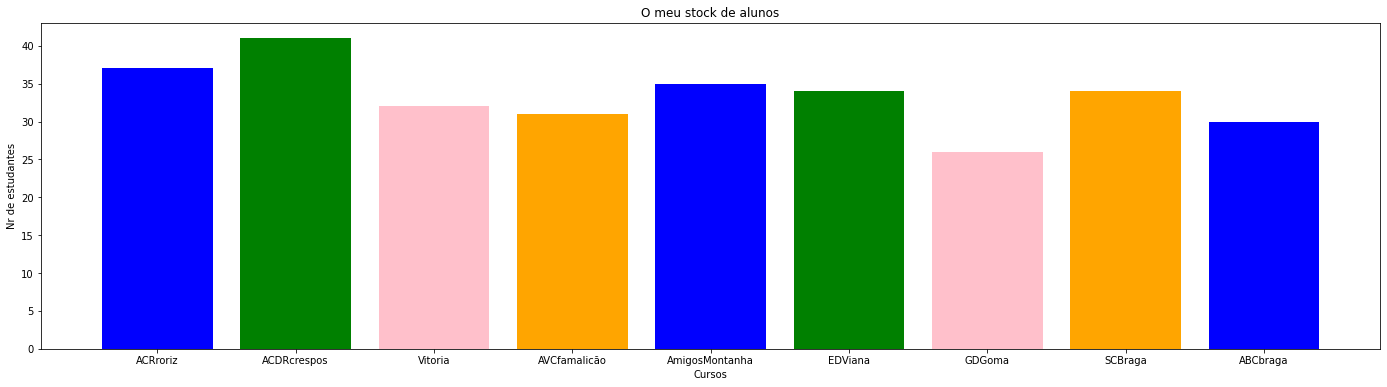

In [18]:
import matplotlib.pyplot as plt
def plotDistribPorModalidade(dm):
    left = []
    k=dict.keys(dm)
    v=dict.values(dm)
    tick_label=[]
    height = []
    
    for l in range(0,len(dm)):
        left.append(l)
    
    for value in v:    
       # print(value)
        height.append(value)
        #print(height)
    print(k)
    for key in k:
        tick_label.append(key)
    
    plt.figure(1, figsize=(24, 6))
    plt.bar(left, height, tick_label = tick_label, width = 0.8, color = ['blue', 'green', 'pink','orange'])
 

    plt.xlabel('Cursos')

    plt.ylabel('Nr de estudantes')

    plt.title('O meu stock de alunos')
 

    plt.show()
plotDistribPorModalidade(Dist)

## Gráfico duma distribuição qualquer (exercício 9)

Especifica uma função que faz o plot dum gráfico com a distribuição passada como argumento.

Nota: Que parâmetros são necessários para ter uma função genérica que trace o gráfico para qualquer distribuição?


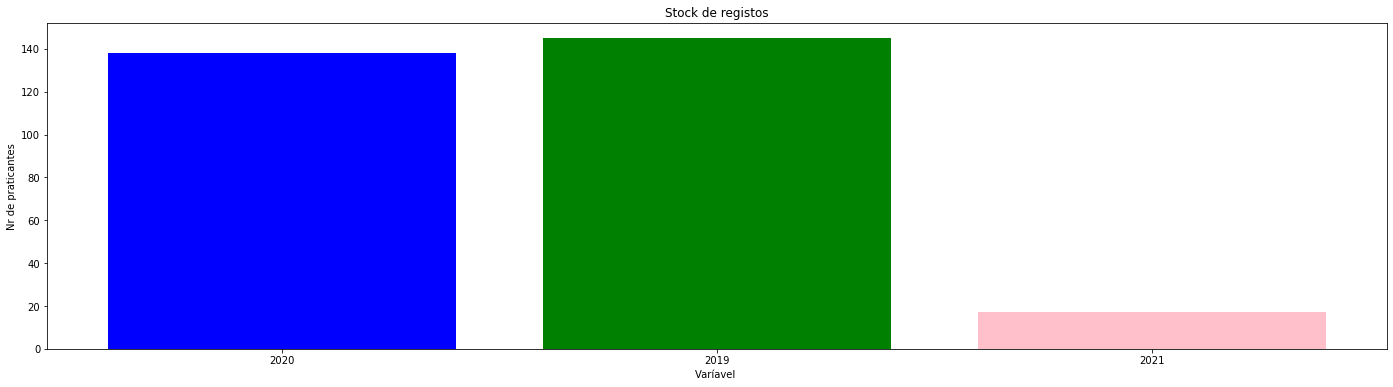

In [19]:
import matplotlib.pyplot as plt
def plotDistrib(bd,n):
    d={}
    
    if n == 2:
        for e in bd:
            if e[2][0:4] in dict.keys(d):
                d[e[2][0:4]] += 1
            else:
                d[e[2][0:4]] = 1
    else:
        for e in bd:
            if e[n] in dict.keys(d):
                d[e[n]] += 1
            else:
                d[e[n]] = 1
    
    left = []
    k=dict.keys(d)
    v=dict.values(d)
    tick_label=[]
    height = []
    
    for l in range(0,len(d)):
        left.append(l)
    
    for value in v:    
       # print(value)
        height.append(value)
        #print(height)
    #print(k)
    for key in k:
        tick_label.append(key)
    
    plt.figure(1, figsize=(24, 6))
    plt.bar(left, height, tick_label = tick_label, width = 0.8, color = ['blue', 'green', 'pink','orange'])
 

    plt.xlabel('Varíavel ')

    plt.ylabel('Nr de praticantes')

    plt.title('Stock de registos')
 

    plt.show()
plotDistrib(BD,2)

In [20]:
import PySimpleGUI as sg
bd=[]
BD = lerDataset("emd.csv")
bd=BD
imp=[]

def jErro(mensagem):
    layout=[[sg.Text(mensagem)], [sg.Button("Sair")]]
    window= sg.Window(title="Mesagem de erro", font="Arial 20", default_element_size=(15,1)).Layout(layout)

    stop=False  
    while not stop:
        event, values = window.read()
        if event == "Sair" or event == sg.WIN_CLOSED:
            stop = True

    window.close()


layout = [[sg.Column([
 
            [sg.Button("Modalidades")],
            [sg.Button("Distribuição por Clube")],
            [sg.Button("Distribuição por Ano")],
            [sg.Button("Distribuição por Modalidades")],
            [sg.Button("Sair")]
            ]), 
            sg.Listbox(values=imp, size=(28,12), key='_imp')]]



window = sg.Window("Aplicação",font="Arial 17").Layout(layout)
stop = False

while not stop:
    event, values = window.read()
    if event == sg.WIN_CLOSED or event=="Sair":
        stop = True
    elif event=="Modalidades":
        if len(bd)==0:              #caso o tamanho da bd seja 0, signifca que nenhuma bd foi inserida
            jErro("Não foi carregada nenhuma base de dados!")
        else:
            for elem in modalidades(bd):             
                imp.append(elem)
            window.find_element('_imp').Update(values=imp)
            imp=[]


    elif event=="Distribuição por Ano":
        if len(bd)==0:
            jErro("Não foi carregada nenhuma base de dados!")
        else:
            plotDistrib(bd,2)
            ano=distribPorAno(bd)
            for c in ano.keys():
                imp.append(c +" - " +str(ano[c]) + "\n")
            window.find_element('_imp').update(values=imp)
            imp=[]

    elif event=="Distribuição por Clube":
        if len(bd)==0:
            jErro("Não foi carregada nenhuma base de dados!")
        else:
            plotDistrib(bd,7)
            clube=distribPorClube(bd)
            for c in clube.keys():
                imp.append(c +" - " +str(clube[c]) + "\n")
            window.find_element('_imp').update(values=imp)
            imp=[]

    elif event=="Distribuição por Modalidades":
        if len(bd)==0:
            jErro("Não foi carregada nenhuma base de dados!")
        else:
            plotDistrib(bd,6)
            modalidades=distribPorModalidade(bd)
            for c in modalidades.keys():
                imp.append(c +" - " +str(modalidades[c]) + "\n")
            window.find_element('_imp').update(values=imp)
            imp=[]
    
    else: 
        print(event + "\n")
        print(values)


        
window.close()

bd=[]     #limpa memória